### CNN German Newset
This notebook follows the steps of the CNN notebook presented in class.
The result seem to be not very good, so I will not go into further details.
Even after 10 epochs the average f1-score is only about 0.5.
Maybe using a more complicated CNN architecture would help but I suspect the number of examples in the dataset to be to small for such a deep learning technique.


In [1]:
!pip install 'fhnw-nlp-utils>=0.1.3'
!pip install pyarrow fastparquet fasttext 
from fhnw.nlp.utils.storage import load_dataframe
from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.colab import runs_on_colab

import numpy as np
import pandas as pd

import tensorflow as tf

print("Tensorflow version:", tf.__version__)

#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version: 2.5.1
GPU is available


In [2]:
# Use prepared data
file = "data/german_news_articles_original_train_and_test_tokenized.parq"
data_all = load_dataframe(file)

In [3]:
data_all.sample(3)

,text_original,label,split,text_clean,token_clean,token_lemma,token_stem,token_clean_stopwords
6966,Rechtsausschuss gab am Dienstag sein Okay - Pl...,Web,train,Rechtsausschuss gab am Dienstag sein Okay Plen...,"[rechtsausschuss, gab, dienstag, okay, plenara...","[rechtsausschuss, geben, dienstag, okay, plena...","[rechtsausschuss, gab, dienstag, okay, plenara...","[rechtsausschuss, gab, dienstag, okay, plenara..."
7989,Apple erzielte im Juli einen Rekordumsatz von ...,Web,train,Apple erzielte im Juli einen Rekordumsatz von ...,"[apple, erzielte, juli, rekordumsatz, milliard...","[apple, erzielen, juli, rekordumsatz, milliard...","[appl, erzielt, juli, rekordumsatz, milliard, ...","[apple, erzielte, juli, rekordumsatz, milliard..."
484,In die Erleichterung um den Erhalt ihrer Arbei...,Etat,train,In die Erleichterung um den Erhalt ihrer Arbei...,"[erleichterung, erhalt, arbeitsplätze, mischt,...","[erleichterung, erhalt, arbeitsplätze, mischen...","[erleichter, erhalt, arbeitsplatz, mischt, mit...","[erleichterung, erhalt, arbeitsplätze, mischt,..."


In [4]:
from fhnw.nlp.utils.params import get_train_test_split, extract_vocabulary_and_set,create_label_binarizer_and_set, extract_text_vectorization_and_set

In [5]:
# used standard params from class
# Maybe increasing cnn_num_conv_pooling_layers would help
params = {
    "verbose": True,
    "shuffle": True,
    "batch_size": 16,
    "X_column_name": "text_clean",
    "y_column_name": "label",
    "embedding_type": "fasttext",
    #"embedding_type": "bytepair",
    "embedding_dim": 300,
    "embedding_mask_zero": True,
    "embedding_trainable": False,
    #"embedding_input_sequence_length": output_sequence_length if 'output_sequence_length' in locals() or 'output_sequence_length' in globals() else None,
    "embedding_fasttext_model": "cc.de.300.bin",
    "embedding_word2vec_model_url": "https://cloud.devmount.de/d2bc5672c523b086/german.model",
    "embedding_spacy_model": "de_core_news_md",
    "embedding_tensorflow_hub_url": "https://tfhub.dev/google/nnlm-de-dim128-with-normalization/2",
    "cnn_num_conv_pooling_layers": 2,
    "model_type": "cnn",
}

In [6]:
create_label_binarizer_and_set(params, data_all)
extract_vocabulary_and_set(params, data_all)

Inferred classification type: multi-class
Median sequence length: 171
Percentil (0.98) cutoff sequence length: 582
Max sequence length: 2563
Used embedding sequence length: 582


In [7]:
extract_text_vectorization_and_set(params)

Vocabulary length: 186181


In [8]:
%%time
from fhnw.nlp.utils.params import extract_embedding_layer_and_set, dataframe_to_dataset

extract_embedding_layer_and_set(params)

Embedding type: fasttext
Number of null word embeddings: 4
Words not found in total: 4
Words without embedding (4/4): ['yq', 'qz', '', 'öw']
CPU times: user 5.45 s, sys: 7.49 s, total: 12.9 s
Wall time: 14.1 s


In [9]:
data_train_orig = data_all.loc[(data_all["split"] == "train")]
data_test_orig = data_all.loc[(data_all["split"] == "test")]


data_train, data_test = get_train_test_split(params, data_train_orig)

dataset_train = dataframe_to_dataset(params, data_train)
dataset_test = dataframe_to_dataset(params, data_test)

7396 train examples
1849 test examples


In [10]:
for text, labels in dataset_train.take(1):
    print(text)
    print(labels)

{'text_clean': <tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'Capitals gehen in Finnland bei K\xc3\xa4rp\xc3\xa4t Oulu mit unter Salzburg verliert zuhause mit \xc3\x96sterreichs Eishockey Clubs Vienna Capitals und Red Bull Salzburg haben ihre Gruppenphase der Champions Hockey League am Samstag jeweils mit einer Niederlage beendet Die bereits fix f\xc3\xbcr die Phase qualifizierten Caps unterlagen bei K\xc3\xa4rp\xc3\xa4t Oulu f\xc3\xbcr die ebenfalls bereits aufgestiegenen Red Bulls setzte es im heimischen Volksgarten eine knappe Niederlage gegen HV J\xc3\xb6nk\xc3\xb6ping Die Capitals blieben bei Gruppensieger K\xc3\xa4rp\xc3\xa4t Oulu zum Abschluss ohne Torerfolg Der finnische Meister der in den vier Gruppenspielen nur einen Gegentreffer kassierte legte den Grundstein zum Sieg mit zwei Toren innerhalb von drei Minuten im zweiten Drittel Leider haben wir im Mitteldrittel auf unseren game plan vergessen und K\xc3\xa4rp\xc3\xa4t zu viele R\xc3\xa4ume gegeben Damit bin ich nicht 

In [11]:
from fhnw.nlp.utils.params import build_model_cnn, compile_model, train_model
# Use CNN model
model = build_model_cnn(params)
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         55854300  
_________________________________________________________________
conv_0 (Conv1D)              (None, None, 128)         268928    
_________________________________________________________________
max_pool_0 (MaxPooling1D)    (None, None, 128)         0         
_________________________________________________________________
conv_1 (Conv1D)              (None, None, 128)         114816    
_________________________________________________________________
global_max_pool_1 (GlobalMax (None, 128)               0         
_________________________________________________________________
global_max_pool_dropout (Dro (None, 128)               0       

In [12]:
compile_model(params, model)
# Load the TensorBoard notebook extension
#%load_ext tensorboard

In [13]:
def train_model_local(params, model, dataset_train, dataset_val):
    """Performs the model training 
    Parameters
    ----------
    params: dict
        The dictionary containing the parameters
    model: model
        The keras model
    dataset_train: tf Dataset
        The dataset for training
    dataset_val; tf Dataset
        The dataset for validation
        
    Returns
    -------
    history
        The training history
    """
        
    import os
    import datetime
    from tensorflow import keras

    training_epochs = params.get("training_epochs", 5)
    training_logdir = params.get("training_logdir", None)
    
    if training_logdir is None:
        training_logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    
    checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*params['batch_size'])

    
    tensorboard_callback = keras.callbacks.TensorBoard(training_logdir, histogram_freq=1)

    history = model.fit(
        dataset_train,
        validation_data=dataset_val,
        callbacks=[cp_callback],
        epochs=training_epochs)
    
    return history

# %tensorboard --logdir logs/

In [14]:
# Training is fast enough so increase number of epochs
params["training_epochs"] = 10
history = train_model_local(params, model, dataset_train, dataset_test)

Epoch 1/10
 80/463 [====>.........................] - ETA: 1:09 - loss: 2.0934 - accuracy: 0.2438
Epoch 00001: saving model to training_2/cp-0001.ckpt
160/463 [=========>....................] - ETA: 52s - loss: 1.9996 - accuracy: 0.2863
Epoch 00001: saving model to training_2/cp-0001.ckpt
240/463 [==============>...............] - ETA: 38s - loss: 1.9422 - accuracy: 0.3148
Epoch 00001: saving model to training_2/cp-0001.ckpt
320/463 [===================>..........] - ETA: 23s - loss: 1.9075 - accuracy: 0.3289
Epoch 00001: saving model to training_2/cp-0001.ckpt
400/463 [========================>.....] - ETA: 10s - loss: 1.8890 - accuracy: 0.3350
Epoch 00001: saving model to training_2/cp-0001.ckpt
463/463 [==============================] - 88s 182ms/step - loss: 1.8788 - accuracy: 0.3391 - val_loss: 1.6530 - val_accuracy: 0.4543
Epoch 2/10
 17/463 [>.............................] - ETA: 23s - loss: 1.8112 - accuracy: 0.4301
Epoch 00002: saving model to training_2/cp-0002.ckpt
 96/463 [

456/463 [============================>.] - ETA: 0s - loss: 1.5516 - accuracy: 0.4500
Epoch 00009: saving model to training_2/cp-0009.ckpt
463/463 [==============================] - 21s 46ms/step - loss: 1.5489 - accuracy: 0.4505 - val_loss: 1.5563 - val_accuracy: 0.4516
Epoch 10/10
 71/463 [===>..........................] - ETA: 12s - loss: 1.5075 - accuracy: 0.4648
Epoch 00010: saving model to training_2/cp-0010.ckpt
153/463 [========>.....................] - ETA: 10s - loss: 1.5031 - accuracy: 0.4653
Epoch 00010: saving model to training_2/cp-0010.ckpt
233/463 [==============>...............] - ETA: 8s - loss: 1.4979 - accuracy: 0.4686
Epoch 00010: saving model to training_2/cp-0010.ckpt
313/463 [===================>..........] - ETA: 5s - loss: 1.5455 - accuracy: 0.4645
Epoch 00010: saving model to training_2/cp-0010.ckpt
393/463 [========================>.....] - ETA: 2s - loss: 1.5578 - accuracy: 0.4609
Epoch 00010: saving model to training_2/cp-0010.ckpt
463/463 [================

INFO:tensorflow:Assets written to: models/cnn/20211114-182910/model_0.46728/assets


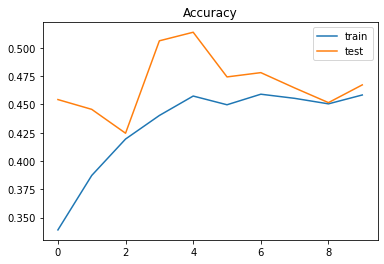

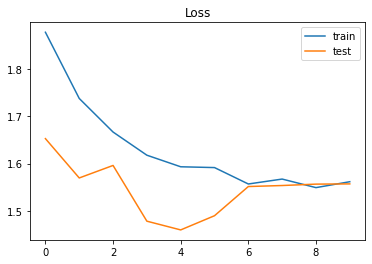

In [15]:
from fhnw.nlp.utils.ploting import plot_history
from fhnw.nlp.utils.params import save_model

# accuracy seems to tend to 0.5
save_model(params, model, history)
plot_history(history)

In [16]:
# Unfreeze all layers (i.e. make embeddings trainable)
model.trainable = True
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         55854300  
_________________________________________________________________
conv_0 (Conv1D)              (None, None, 128)         268928    
_________________________________________________________________
max_pool_0 (MaxPooling1D)    (None, None, 128)         0         
_________________________________________________________________
conv_1 (Conv1D)              (None, None, 128)         114816    
_________________________________________________________________
global_max_pool_1 (GlobalMax (None, 128)               0         
_________________________________________________________________
global_max_pool_dropout (Dro (None, 128)               0       

In [17]:
from fhnw.nlp.utils.params import re_compile_model
re_compile_model(params, model)

In [18]:
params["training_epochs"] = 10
history = train_model_local(params, model, dataset_train, dataset_test)

Epoch 1/10
 80/463 [====>.........................] - ETA: 2:42 - loss: 1.3951 - accuracy: 0.4961
Epoch 00001: saving model to training_2/cp-0001.ckpt
160/463 [=========>....................] - ETA: 2:07 - loss: 1.4160 - accuracy: 0.4812
Epoch 00001: saving model to training_2/cp-0001.ckpt
240/463 [==============>...............] - ETA: 1:32 - loss: 1.4482 - accuracy: 0.4779
Epoch 00001: saving model to training_2/cp-0001.ckpt
320/463 [===================>..........] - ETA: 58s - loss: 1.4719 - accuracy: 0.4715
Epoch 00001: saving model to training_2/cp-0001.ckpt
400/463 [========================>.....] - ETA: 25s - loss: 1.4798 - accuracy: 0.4725
Epoch 00001: saving model to training_2/cp-0001.ckpt
463/463 [==============================] - 202s 436ms/step - loss: 1.4852 - accuracy: 0.4734 - val_loss: 1.5546 - val_accuracy: 0.4824
Epoch 2/10
 17/463 [>.............................] - ETA: 2:53 - loss: 1.4124 - accuracy: 0.4963
Epoch 00002: saving model to training_2/cp-0002.ckpt
 97/4

INFO:tensorflow:Assets written to: models/cnn/20211114-190316/model_0.50027/assets


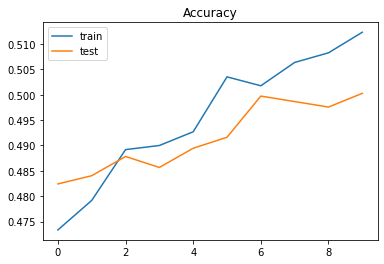

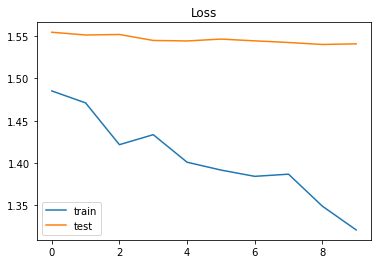

In [19]:
save_model(params, model, history)
plot_history(history)

Set Population: 9245
Accuracy: 0.5312


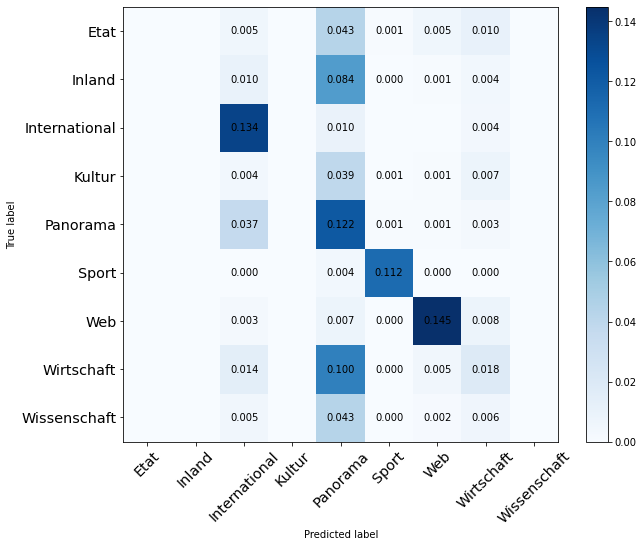

               precision    recall  f1-score   support

         Etat       0.00      0.00      0.00       601
       Inland       0.00      0.00      0.00       913
International       0.63      0.91      0.75      1360
       Kultur       0.00      0.00      0.00       485
     Panorama       0.27      0.75      0.40      1510
        Sport       0.98      0.96      0.97      1081
          Web       0.91      0.89      0.90      1509
   Wirtschaft       0.30      0.13      0.19      1270
 Wissenschaft       0.00      0.00      0.00       516

     accuracy                           0.53      9245
    macro avg       0.34      0.40      0.35      9245
 weighted avg       0.44      0.53      0.46      9245



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from fhnw.nlp.utils.ploting import report_classification_results

report_classification_results(params, data_train_orig, model)